# Artificial Neural Network

### Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Part 1 - Data Preprocessing

In [3]:
df=pd.read_csv("/content/spam.csv",encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df=df.rename(columns={'v1':'label','v2':'Text'})
df['Label_encoder']=df['label'].map({'ham':0,'spam':1})
df.head()

,label,Text,Label_encoder
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


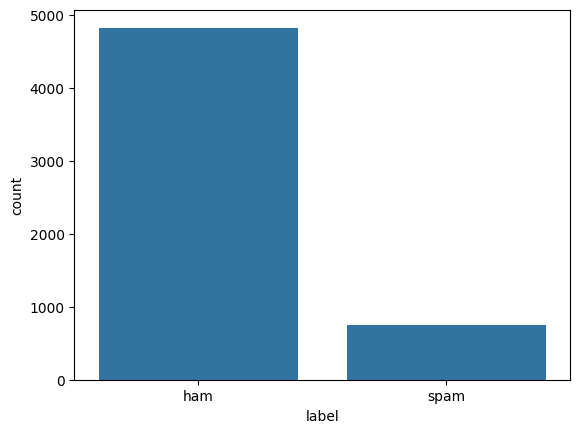

In [5]:
sns.countplot(x=df['label'])
plt.show()

In [6]:
avg_words_len = round(sum([len(i.split()) for i in df['Text']]) / len(df['Text']))
print(avg_words_len)

15


In [7]:

# Finding Total no of unique words in corpus
s = set()
for sent in df['Text']:
  for word in sent.split():
    s.add(word)
total_words_length=len(s)
print(total_words_length)

15585


### Importing the dataset

### Encoding categorical data

Label Encoding the "Gender" column

One Hot Encoding the "Geography" column

### Splitting the dataset into the Training set and Test set

In [8]:
from sklearn.model_selection import train_test_split

X, y = np.asanyarray(df['Text']), np.asanyarray(df['Label_encoder'])
new_df = pd.DataFrame({'Text': X, 'label': y})
X_train, X_test, y_train, y_test = train_test_split(
    new_df['Text'], new_df['label'], test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4457,), (4457,), (1115,), (1115,))

### Feature Scaling

## Part 2 - Building the ANN

### Initializing the ANN

In [9]:
from tensorflow.keras.layers import TextVectorization

MAXTOKENS=total_words_length
OUTPUTLEN=avg_words_len

text_vec = TextVectorization(
    max_tokens=MAXTOKENS,
    standardize='lower_and_strip_punctuation',
    output_mode='int',
    output_sequence_length=OUTPUTLEN
)
text_vec.adapt(X_train)

In [10]:
sample_sentence='Mayukh is a good boy'
text_vec([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  1,  10,   5,  58, 594,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [12]:
embedding_layer = layers.Embedding(
    input_dim=MAXTOKENS,
    output_dim=128,
    embeddings_initializer='uniform',
    input_length=OUTPUTLEN
)

### Adding the input layer and the first hidden layer

In [14]:
input_layer = layers.Input(shape=(1,), dtype=tf.string)
vec_layer = text_vec(input_layer)
embedding_layer_model = embedding_layer(vec_layer)
x = layers.GlobalAveragePooling1D()(embedding_layer_model)
x = layers.Flatten()(x)
x = layers.Dense(32, activation='relu')(x)
output_layer = layers.Dense(1, activation='sigmoid')(x)
model=keras.Model(input_layer, output_layer)

model.compile(optimizer='adam', loss=keras.losses.BinaryCrossentropy(
    label_smoothing=0.5), metrics=['accuracy'])

In [15]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 15)                0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 15, 128)           1994880   
                                                                 
 global_average_pooling1d_1  (None, 128)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 flatten_1 (Flatten)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                4128

In [17]:
history = model.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test),validation_steps=int(0.2*len(X_test)))

Epoch 1/5
140/140 [==============================] - 5s 31ms/step - loss: 0.6069 - accuracy: 0.9069 - val_loss: 0.5771 - val_accuracy: 0.9767
Epoch 2/5
140/140 [==============================] - 5s 33ms/step - loss: 0.5702 - accuracy: 0.9870 - val_loss: 0.5733 - val_accuracy: 0.9830
Epoch 3/5
140/140 [==============================] - 4s 26ms/step - loss: 0.5658 - accuracy: 0.9957 - val_loss: 0.5727 - val_accuracy: 0.9821
Epoch 4/5
140/140 [==============================] - 4s 28ms/step - loss: 0.5641 - accuracy: 0.9987 - val_loss: 0.5723 - val_accuracy: 0.9803
Epoch 5/5
140/140 [==============================] - 5s 38ms/step - loss: 0.5633 - accuracy: 0.9991 - val_loss: 0.5722 - val_accuracy: 0.9812


### Adding the second hidden layer

### Adding the output layer

<Axes: >

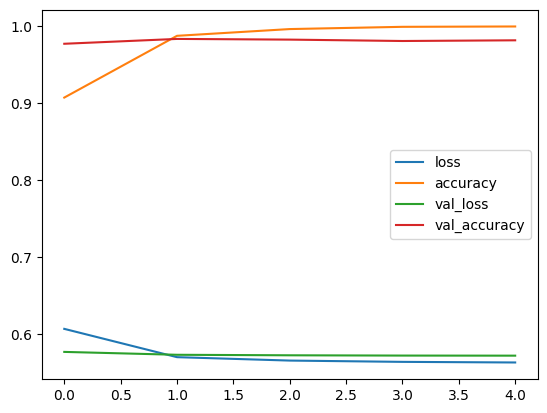

In [18]:
pd.DataFrame(history.history).plot()

## Part 3 - Training the ANN

### Compiling the ANN

### Training the ANN on the Training set

## Part 4 - Making the predictions and evaluating the model

### Predicting the result of a single observation

**Homework**

Use our ANN model to predict if the customer with the following informations will leave the bank:

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer?

**Solution**

Therefore, our ANN model predicts that this customer stays in the bank!

**Important note 1:** Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array.

**Important note 2:** Notice also that the "France" country was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, because the dummy variables are always created in the first columns.

### Predicting the Test set results

In [26]:
from sklearn.metrics import accuracy_score
y_preds = np.round(model.predict(X))
accuracy = accuracy_score(y, y_preds)
print(accuracy)
print(np.concatenate((y_preds.reshape(len(y_preds),1), y_test.reshape(len(y_test),1)),1))

175/175 [==============================] - 1s 3ms/step
0.9958722182340273


AttributeError: 'Series' object has no attribute 'reshape'

### Making the Confusion Matrix